# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
weather_api_key = "31956b2ede4a3c4f153a9f62517a8431"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_ids = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL and imperial units
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# City data

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
            
        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | cheyenne
Processing Record 11 of Set 1 | menomonie
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | eisiskes
Processing Record 15 of Set 1 | shu
Processing Record 16 of Set 1 | salinopolis
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | pran buri
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | san quintin
Processing Record 22 of Set 1 | barentsburg
City not foun

Processing Record 40 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 4 | kapaa
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | kendari
Processing Record 44 of Set 4 | gillette
Processing Record 45 of Set 4 | armacao dos buzios
City not found. Skipping...
Processing Record 46 of Set 4 | kalmunai
Processing Record 47 of Set 4 | port-gentil
Processing Record 48 of Set 4 | te anau
Processing Record 49 of Set 4 | samana
Processing Record 50 of Set 4 | kamenka
Processing Record 1 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 2 of Set 5 | sambava
Processing Record 3 of Set 5 | burica
City not found. Skipping...
Processing Record 4 of Set 5 | liepaja
Processing Record 5 of Set 5 | orchard homes
Processing Record 6 of Set 5 | chokurdakh
Processing Record 7 of Set 5 | galveston
Processing Record 8 of Set 5 | port-cartier
Processing Record 9 of Set 5 | san vicente de canete
Processing Record 10 of Set 5 | yatou
Processi

Processing Record 24 of Set 8 | cobija
Processing Record 25 of Set 8 | port blair
Processing Record 26 of Set 8 | jaisalmer
Processing Record 27 of Set 8 | hvammstangi
City not found. Skipping...
Processing Record 28 of Set 8 | grindavik
Processing Record 29 of Set 8 | biak
Processing Record 30 of Set 8 | takhatgarh
Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | san patricio
Processing Record 33 of Set 8 | yenagoa
Processing Record 34 of Set 8 | maracas
Processing Record 35 of Set 8 | kirensk
Processing Record 36 of Set 8 | catamarca
Processing Record 37 of Set 8 | fereydun kenar
Processing Record 38 of Set 8 | jha jha
Processing Record 39 of Set 8 | longyearbyen
Processing Record 40 of Set 8 | arenapolis
Processing Record 41 of Set 8 | flinders
Processing Record 42 of Set 8 | kjollefjord
Processing Record 43 of Set 8 | beaufort
Processing Record 44 of Set 8 | kloulklubed
Processing Record 45 of Set 8 | burla
Processing Record 46 of Set 8 | lucapa
Processing R

Processing Record 7 of Set 12 | wonthaggi
Processing Record 8 of Set 12 | altamira
Processing Record 9 of Set 12 | gornyy
Processing Record 10 of Set 12 | klyuchi
Processing Record 11 of Set 12 | alice springs
Processing Record 12 of Set 12 | mozhga
Processing Record 13 of Set 12 | riyadh
Processing Record 14 of Set 12 | dossor
Processing Record 15 of Set 12 | morro bay
Processing Record 16 of Set 12 | laguna
Processing Record 17 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 12 | koshurnikovo
Processing Record 19 of Set 12 | rezekne
Processing Record 20 of Set 12 | kiama
Processing Record 21 of Set 12 | impfondo
Processing Record 22 of Set 12 | zhaozhou
Processing Record 23 of Set 12 | kiunga
Processing Record 24 of Set 12 | hammerfest
Processing Record 25 of Set 12 | caudry
Processing Record 26 of Set 12 | albanel
Processing Record 27 of Set 12 | rawson
Processing Record 28 of Set 12 | ndele
Processing Record 29 of Set 12 | kegayli
City not found. Sk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create city data dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.40,80,33,15.75,PF,1658711762
1,Puerto Ayora,-0.7393,-90.3518,70.56,91,99,5.99,EC,1658711763
2,Castro,-24.7911,-50.0119,58.86,73,100,2.91,BR,1658711763
3,Mahebourg,-20.4081,57.7000,64.69,88,75,3.44,MU,1658711764
4,Fortuna,40.5982,-124.1573,64.92,75,26,1.99,US,1658711764
...,...,...,...,...,...,...,...,...,...
543,Pochutla,15.7432,-96.4661,75.81,89,74,2.73,MX,1658712579
544,Zabol,32.2500,67.2500,73.60,59,100,8.68,AF,1658712579
545,Touros,-5.1989,-35.4608,73.99,72,75,16.82,BR,1658712640
546,Bang Saphan,11.2126,99.5117,83.28,75,44,0.60,TH,1658712640


In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.935805,12.982043,69.392755,73.430657,54.352190,7.240894,1.658712e+09
std,33.006242,90.957424,13.416922,19.900317,41.445963,4.948693,2.693726e+02
min,-54.800000,-179.166700,28.260000,1.000000,0.000000,0.000000,1.658711e+09
25%,-7.990500,-65.934425,60.465000,63.000000,7.000000,3.440000,1.658712e+09
50%,24.911150,17.129350,71.680000,78.000000,66.000000,5.990000,1.658712e+09
75%,47.481825,86.254200,79.537500,88.000000,100.000000,9.582500,1.658712e+09
max,78.218600,179.316700,104.310000,100.000000,100.000000,29.910000,1.658713e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# The described dataframe displays the max humidity at 100%,
# so this step should be skipped.

In [9]:
# Get the indices of cities that have humidity over 100%.
# This cannot be done as there are no cities with humidity over 100%. 

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# This cannot be done as there are no cities with humidity over 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

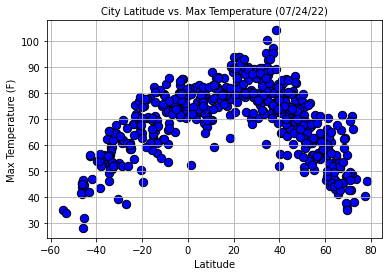

In [11]:
# Build scatter plot for each data type
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color="blue", s=[70], edgecolors="black")
#plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title("City Latitude vs. Max Temperature (07/24/22)", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

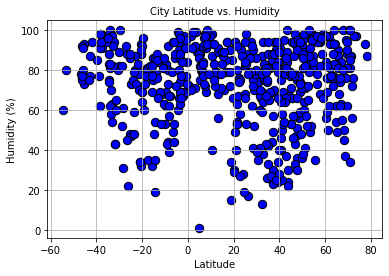

In [12]:
# Build scatter plot for each data type
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color="blue", s=[70], edgecolors="black")
#plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title("City Latitude vs. Humidity (07/24/22)", fontsize=10)
plt.ylabel("Humidity (%)", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

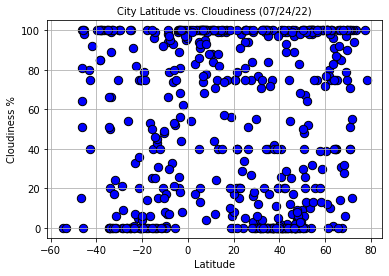

In [13]:
# Build scatter plot for each data type
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color="blue", s=[70], edgecolors="black")
#plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title("City Latitude vs. Cloudiness (07/24/22)", fontsize=10)
plt.ylabel("Cloudiness %", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

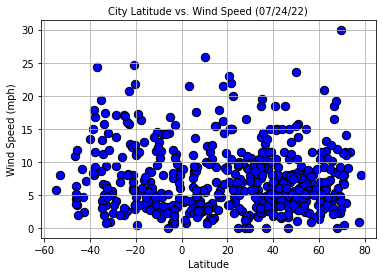

In [42]:
# Build scatter plot for each data type
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color="blue", s=[70], edgecolors="black")

# Incorporate the other graph properties:
plt.title("City Latitude vs. Wind Speed (07/24/22)", fontsize=10)
plt.ylabel("Wind Speed (mph)", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
# Find cities located in the Northern Hemisphere
northern_hemisphere = city_data_df["Lat"]>0
northern_hemisphere_cities = np.where(northern_hemisphere)[0]
northern_hemisphere_cities

array([  4,   7,   8,   9,  12,  13,  15,  16,  18,  19,  20,  22,  23,
        25,  26,  29,  30,  32,  33,  34,  35,  36,  38,  39,  40,  42,
        44,  45,  47,  48,  50,  52,  53,  56,  57,  58,  59,  60,  62,
        63,  64,  65,  67,  68,  69,  71,  72,  73,  75,  76,  77,  79,
        81,  82,  83,  84,  86,  88,  89,  90,  92,  93,  96,  97,  98,
        99, 101, 104, 105, 107, 110, 112, 113, 114, 116, 118, 120, 121,
       123, 125, 126, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 147, 149, 150, 151, 154, 155,
       156, 157, 158, 159, 161, 164, 165, 166, 171, 172, 173, 175, 178,
       179, 182, 183, 185, 186, 187, 188, 189, 191, 192, 195, 196, 197,
       198, 202, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216,
       217, 218, 219, 221, 222, 223, 224, 225, 228, 232, 233, 234, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 261, 262, 263, 26

The r-value is: 0.23130038952765672


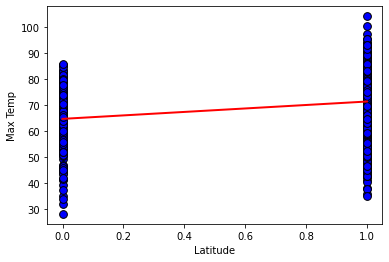

In [52]:
# Northern Hemisphere: Build scatter plot with linear regression line
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]>0
y_values = city_data_df["Max Temp"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.ylabel("Max Temp", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


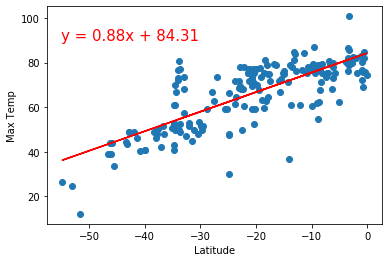

In [26]:
# Southern Hemisphere: Build scatter plot with linear regression line
# Once the northern hemi plot is done, copy/paste and adjust for southern

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


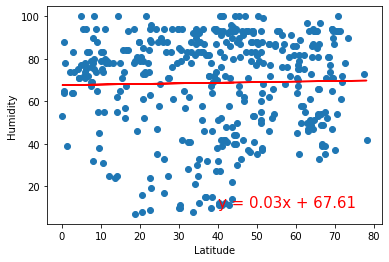

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


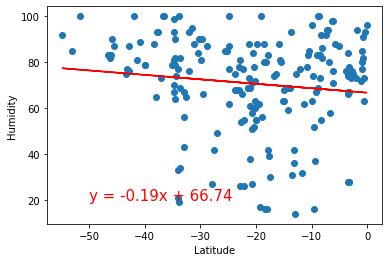

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


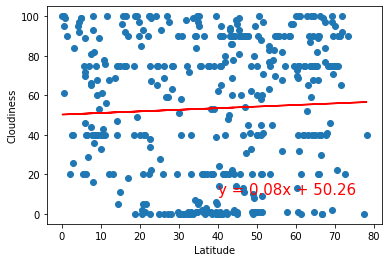

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


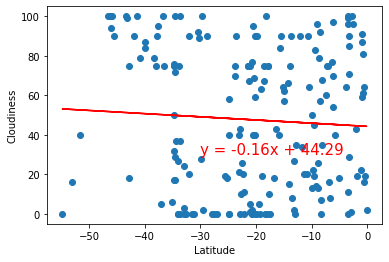

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


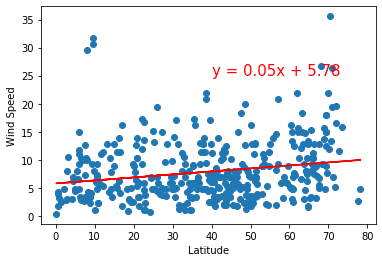

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


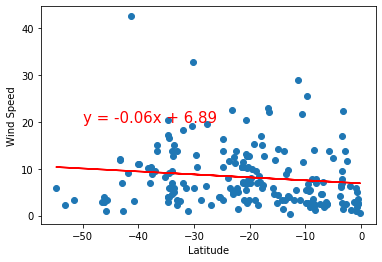